### Apriori 

Apriori is an algorithm used to identify frequent item sets (in our case, item pairs).

It does so using a "bottom up" approach, first identifying individual items that satisfy a minimum occurence threshold. It then extends the item set, adding one item at a time and checking if the resulting item set still satisfies the specified threshold

    There are 3 key metrics to consider when evaluating association rules:
    1.support
    2.confidence
    3.lift


1.support:
This is the percentage of orders/transactions that contains the item set

2.confidence:
Given two items, A and B, confidence measures the percentage of times that item B is purchased, given that item A was purchased. 

    confidence{A->B} = support{A,B} / support{A}
    confidence{B->A} = support{A,B} / support{B} 

3.lift:
Given two items, A and B, lift indicates whether there is a relationship between A and B, or whether the two items are occuring together in the same orders simply by chance (ie: at random). Unlike the confidence metric whose value may vary depending on direction (eg: confidence{A->B} may be different from confidence{B->A}), lift has no direction. This means that the lift{A,B} is always equal to the lift{B,A}
    
    lift{A,B} = lift{B,A} = support{A,B} / (support{A} * support{B})

    lift = 1 implies no relationship between A and B. (ie: A and B occur together only by chance)
    lift > 1 implies that there is a positive relationship between A and B.(ie:  A and B occur together more often than random)
    lift < 1 implies that there is a negative relationship between A and B.(ie:  A and B occur together less often than random)


#### Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [24]:
dataset = pd.read_csv(r'castello.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,items,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
count,13567,12343,11748,11230,10750,10260,9833,9427,9005,8578,...,1,1,1,1,1,1,1,1,1,1
unique,2369,2290,2280,2244,2229,2203,2160,2118,2104,2087,...,1,1,1,1,1,1,1,1,1,1
top,REGENCY CAKESTAND 3 TIER,PARTY BUNTING,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,PARTY BUNTING,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,...,JUMBO BAG RED RETROSPOT,JUMBO BAG STRAWBERRY,WHITE HANGING HEART T-LIGHT HOLDER,BEADED PEARL HEART WHITE ON STICK,BEADED CRYSTAL HEART GREEN ON STICK,LARGE HANGING IVORY & RED WOOD BIRD,SMALL HANGING IVORY/RED WOOD BIRD,HANGING WOOD AND FELT BUTTERFLY,HANGING WOOD AND FELT FLOWER,MIDNIGHT BLUE GLASS/SILVER BRACELET
freq,168,102,86,88,83,74,64,48,49,65,...,1,1,1,1,1,1,1,1,1,1


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13567 entries, 0 to 13566
Columns: 214 entries, 0 to 213
dtypes: object(214)
memory usage: 22.2+ MB


In [27]:
dataset.isnull().sum()

0          0
1       1224
2       1819
3       2337
4       2817
       ...  
209    13566
210    13566
211    13566
212    13566
213    13566
Length: 214, dtype: int64

### Data Preprocessing

In [28]:
#dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 13566):
    transactions.append([str(dataset.values[i,j]) for j in range(1, 214)])
    
    
# conveting it into an numpy array
transactions = np.array(transactions)

# checking the shape of the array
print(transactions.shape)

# having a look at the top 10 customer's items list
print(transactions[1:10])

(13566, 213)
[['WHITE METAL LANTERN' 'CREAM CUPID HEARTS COAT HANGER'
  'KNITTED UNION FLAG HOT WATER BOTTLE' ... 'nan' 'nan' 'nan']
 ['HAND WARMER RED POLKA DOT' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ["POPPY'S PLAYHOUSE BEDROOM" "POPPY'S PLAYHOUSE KITCHEN"
  'FELTCRAFT PRINCESS CHARLOTTE DOLL' ... 'nan' 'nan' 'nan']
 ...
 ['nan' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['HAND WARMER UNION JACK' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['WHITE METAL LANTERN' 'CREAM CUPID HEARTS COAT HANGER'
  'EDWARDIAN PARASOL RED' ... 'nan' 'nan' 'nan']]


In [29]:
len(transactions)

13566

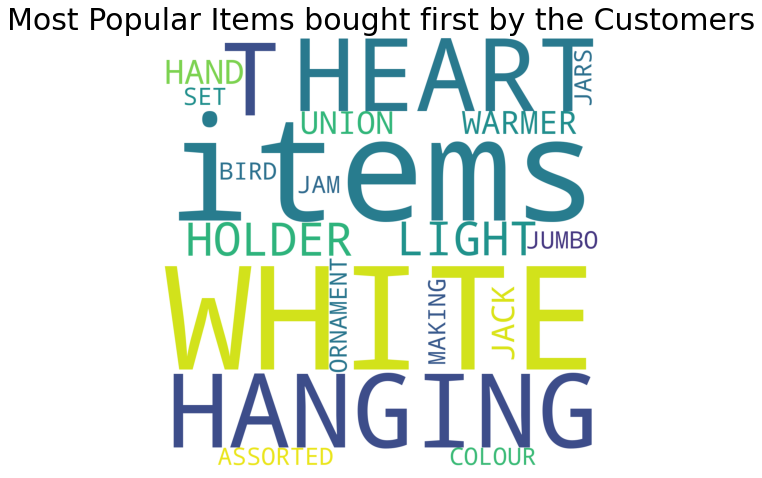

In [30]:
plt.rcParams['figure.figsize'] = (10, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(dataset[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 30)
plt.show()

## Training the Apriori model on the dataset

In [31]:
rules = apriori(transactions = transactions, min_support = 0.01, min_confidence = 0.01, min_lift = 1.5, min_length = 2, max_length = 4)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [32]:
results = list(rules)

In [33]:
results

[RelationRecord(items=frozenset({' BACK DOOR', 'KEY FOB '}), support=0.010541058528674627, ordered_statistics=[OrderedStatistic(items_base=frozenset({' BACK DOOR'}), items_add=frozenset({'KEY FOB '}), confidence=0.9930555555555555, lift=55.6685606060606), OrderedStatistic(items_base=frozenset({'KEY FOB '}), items_add=frozenset({' BACK DOOR'}), confidence=0.5909090909090909, lift=55.66856060606061)]),
 RelationRecord(items=frozenset({' SHED', 'KEY FOB '}), support=0.011941618752764263, ordered_statistics=[OrderedStatistic(items_base=frozenset({' SHED'}), items_add=frozenset({'KEY FOB '}), confidence=0.9818181818181818, lift=55.03861758076634), OrderedStatistic(items_base=frozenset({'KEY FOB '}), items_add=frozenset({' SHED'}), confidence=0.6694214876033058, lift=55.03861758076634)]),
 RelationRecord(items=frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES', '60 TEATIME FAIRY CAKE CASES'}), support=0.013563320064868052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'60 TEATIME F

### Putting the results well organised into a Pandas DataFrame

In [34]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [35]:
results_df = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [36]:
results_df

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,BACK DOOR,KEY FOB,0.010541,0.993056,55.668561
1,SHED,KEY FOB,0.011942,0.981818,55.038618
2,60 TEATIME FAIRY CAKE CASES,PACK OF 60 PINK PAISLEY CAKE CASES,0.013563,0.399132,10.983020
3,60 TEATIME FAIRY CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES,0.016807,0.494577,9.042361
4,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE RED,0.010320,0.707071,16.798811
...,...,...,...,...,...
653,LUNCH BAG RED RETROSPOT,nan,0.011868,0.172193,8.881991
654,LUNCH BAG RED RETROSPOT,nan,0.013563,0.196791,9.301996
655,LUNCH BAG RED RETROSPOT,nan,0.010983,0.159358,9.782147
656,PINK REGENCY TEACUP AND SAUCER,nan,0.011057,0.355450,18.909953


### Displaying the results sorted by descending lifts

In [37]:
results_df.nlargest(n =250, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
238,REGENCY MILK JUG PINK,REGENCY SUGAR BOWL GREEN,0.010172,0.788571,56.902979
566,REGENCY MILK JUG PINK,nan,0.010172,0.788571,56.902979
0,BACK DOOR,KEY FOB,0.010541,0.993056,55.668561
255,BACK DOOR,nan,0.010541,0.993056,55.668561
1,SHED,KEY FOB,0.011942,0.981818,55.038618
...,...,...,...,...,...
623,LUNCH BAG BLACK SKULL.,nan,0.012089,0.219545,10.713473
462,LUNCH BAG BLACK SKULL.,LUNCH BAG SUKI DESIGN,0.011426,0.207497,10.703040
633,LUNCH BAG BLACK SKULL.,nan,0.011426,0.207497,10.703040
383,JUMBO BAG PINK POLKADOT,JUMBO SHOPPER VINTAGE RED PAISLEY,0.014522,0.253213,10.667989
